# Lab 01: Prime Number Distribution (1-100)

This notebook demonstrates:
1. Finding prime numbers from 1 to 100
2. Visualizing prime number distribution using bar charts
3. Analyzing prime number patterns

In [18]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Set default figure size
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Find Prime Numbers

A prime number is a natural number greater than 1 that has no positive divisors other than 1 and itself.

In [19]:
def is_prime(n):
    """Check if a number is prime"""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    
    # Check odd divisors up to sqrt(n)
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

# Find all prime numbers from 1 to 100
primes = [n for n in range(1, 101) if is_prime(n)]

print(f"Prime numbers from 1 to 100:")
print(primes)
print(f"\nTotal count: {len(primes)} prime numbers")

Prime numbers from 1 to 100:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

Total count: 25 prime numbers


## 2. Basic Bar Chart: Prime Numbers

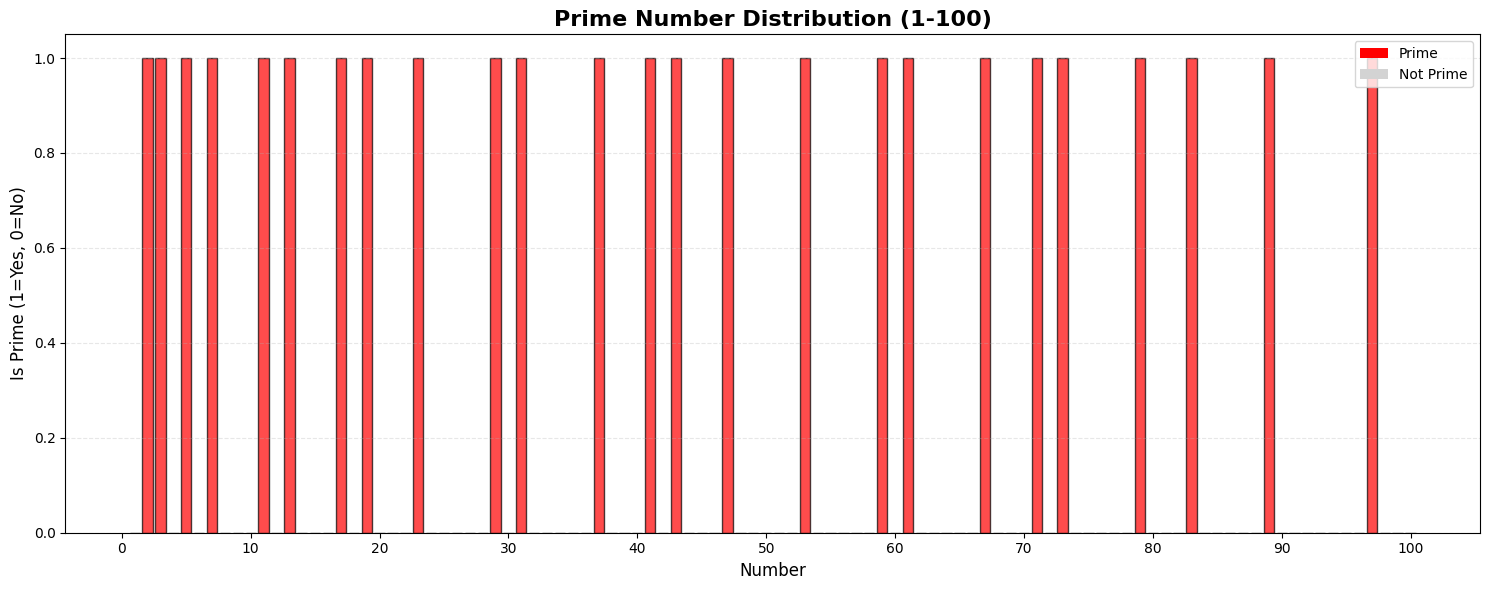

In [20]:
# Create array to mark prime numbers
numbers = np.arange(1, 101)
is_prime_array = np.array([1 if is_prime(n) else 0 for n in numbers])

# Create bar chart
plt.figure(figsize=(15, 6))
colors = ['red' if is_prime(n) else 'lightgray' for n in numbers]
plt.bar(numbers, is_prime_array, color=colors, edgecolor='black', alpha=0.7)

plt.title('Prime Number Distribution (1-100)', fontsize=16, fontweight='bold')
plt.xlabel('Number', fontsize=12)
plt.ylabel('Is Prime (1=Yes, 0=No)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(np.arange(0, 101, 10))

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Prime'),
                   Patch(facecolor='lightgray', label='Not Prime')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## 3. Prime Numbers Only Bar Chart

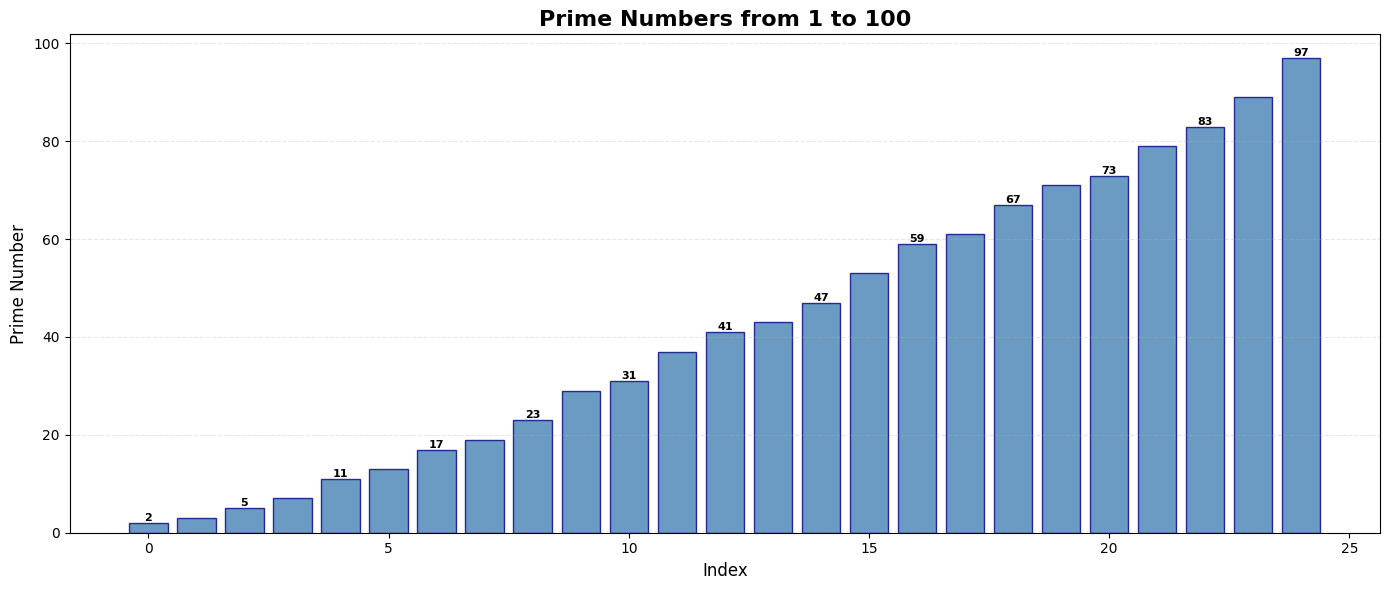

Displayed 25 prime numbers


In [21]:
# Display only prime numbers
plt.figure(figsize=(14, 6))
plt.bar(range(len(primes)), primes, color='steelblue', edgecolor='navy', alpha=0.8)

plt.title('Prime Numbers from 1 to 100', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Prime Number', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, prime in enumerate(primes):
    if i % 2 == 0:  # Show every other label to avoid crowding
        plt.text(i, prime, str(prime), ha='center', va='bottom', 
                fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Displayed {len(primes)} prime numbers")

## 4. Prime Count by Decade (10-Unit Intervals)

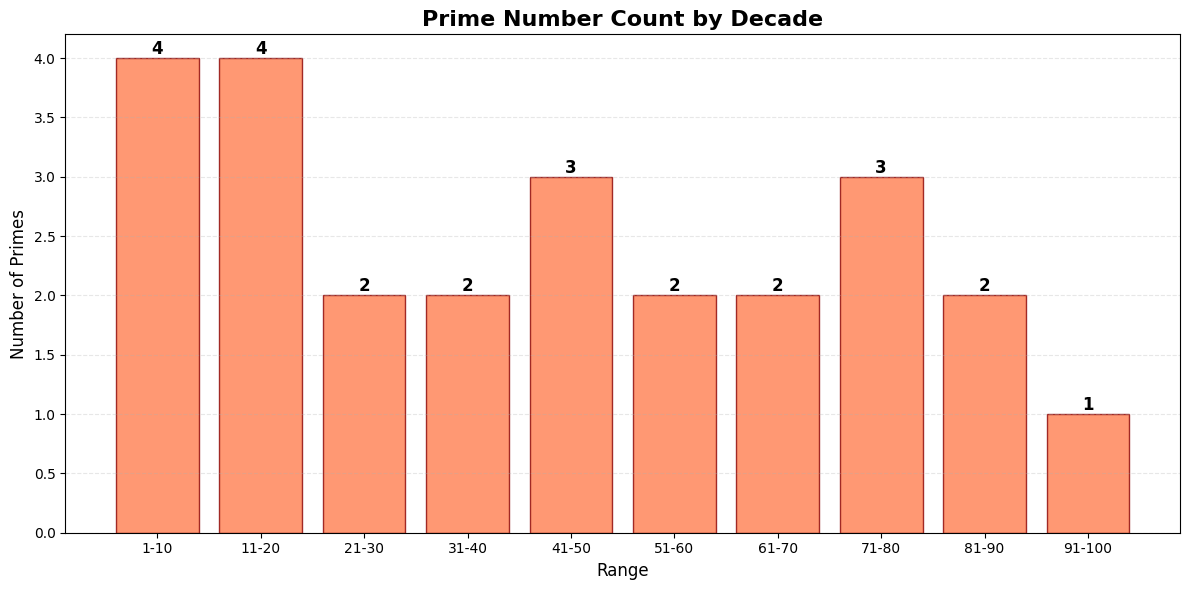


Prime count by decade:
1-10: 4 primes
11-20: 4 primes
21-30: 2 primes
31-40: 2 primes
41-50: 3 primes
51-60: 2 primes
61-70: 2 primes
71-80: 3 primes
81-90: 2 primes
91-100: 1 primes


In [22]:
# Count primes in each decade
decades = []
prime_counts = []
decade_labels = []

for i in range(10):
    start = i * 10 + 1
    end = (i + 1) * 10
    count = sum(1 for n in range(start, end + 1) if is_prime(n))
    prime_counts.append(count)
    decade_labels.append(f'{start}-{end}')

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(decade_labels, prime_counts, color='coral', 
               edgecolor='darkred', alpha=0.8)

# Add value labels
for bar, count in zip(bars, prime_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(count)}', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

plt.title('Prime Number Count by Decade', fontsize=16, fontweight='bold')
plt.xlabel('Range', fontsize=12)
plt.ylabel('Number of Primes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\nPrime count by decade:")
for label, count in zip(decade_labels, prime_counts):
    print(f"{label}: {count} primes")

## 5. Cumulative Prime Count

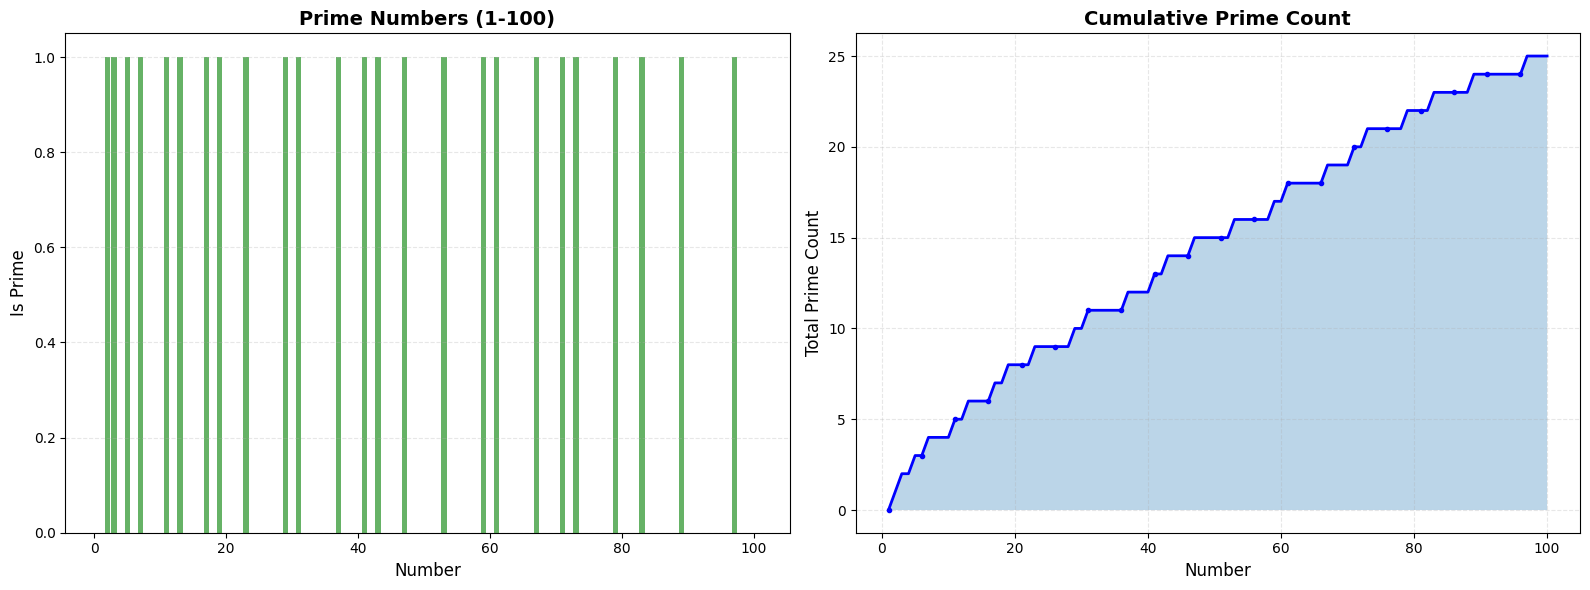


Total primes up to 100: 25


In [23]:
# Calculate cumulative prime count
cumulative_count = []
count = 0

for n in range(1, 101):
    if is_prime(n):
        count += 1
    cumulative_count.append(count)

# Create line plot with bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Bar chart
ax1.bar(range(1, 101), is_prime_array, color='green', alpha=0.6)
ax1.set_title('Prime Numbers (1-100)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number', fontsize=12)
ax1.set_ylabel('Is Prime', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right: Cumulative count
ax2.plot(range(1, 101), cumulative_count, color='blue', linewidth=2, marker='o', 
         markersize=3, markevery=5)
ax2.fill_between(range(1, 101), cumulative_count, alpha=0.3)
ax2.set_title('Cumulative Prime Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number', fontsize=12)
ax2.set_ylabel('Total Prime Count', fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"\nTotal primes up to 100: {cumulative_count[-1]}")

## 6. Prime Number Statistics

Prime Number Statistics (1-100)
Count     :      25.00
Min       :       2.00
Max       :      97.00
Mean      :      42.40
Median    :      41.00
Std Dev   :      28.88


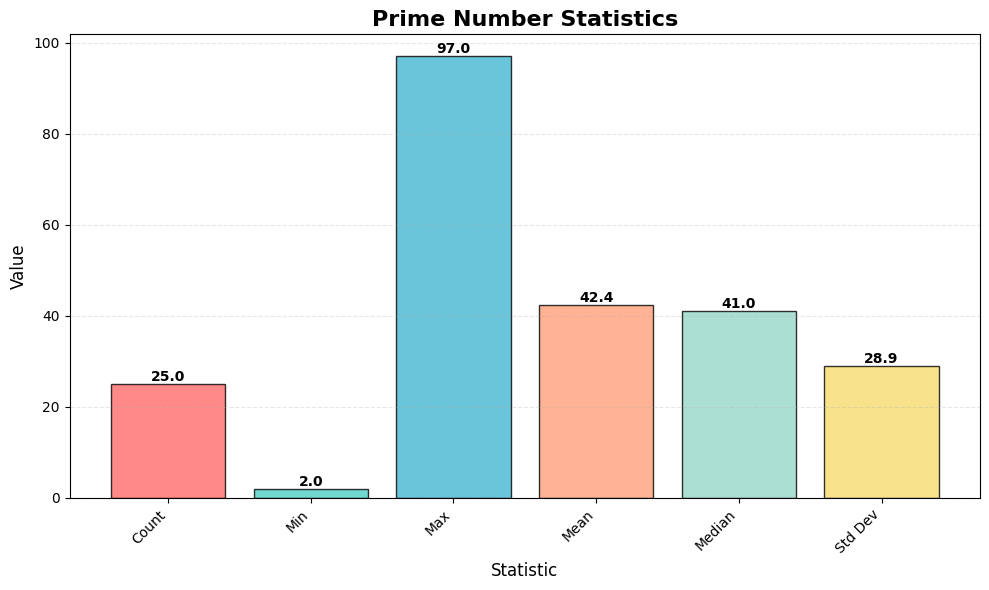

In [24]:
# Calculate statistics
stats = {
    'Count': len(primes),
    'Min': min(primes),
    'Max': max(primes),
    'Mean': np.mean(primes),
    'Median': np.median(primes),
    'Std Dev': np.std(primes)
}

# Print statistics
print("=" * 50)
print("Prime Number Statistics (1-100)")
print("=" * 50)
for key, value in stats.items():
    print(f"{key:10s}: {value:10.2f}")
print("=" * 50)

# Visualize statistics
plt.figure(figsize=(10, 6))
stat_names = list(stats.keys())
stat_values = list(stats.values())
colors_list = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

bars = plt.bar(stat_names, stat_values, color=colors_list, 
               edgecolor='black', alpha=0.8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.title('Prime Number Statistics', fontsize=16, fontweight='bold')
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## Summary

### Key Findings:

1. **Total Prime Numbers**: There are 25 prime numbers between 1 and 100
2. **Distribution**: Primes become less frequent in higher ranges
3. **Largest Prime**: 97 is the largest prime number under 100
4. **Smallest Prime**: 2 is the smallest (and only even) prime number

### Prime Numbers (1-100):
2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97

### Code Example:

```python
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

primes = [n for n in range(1, 101) if is_prime(n)]
print(f"Found {len(primes)} prime numbers")
```